<a href="https://colab.research.google.com/github/manjuiitm/MLP/blob/main/ML_%7C_Bagging_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

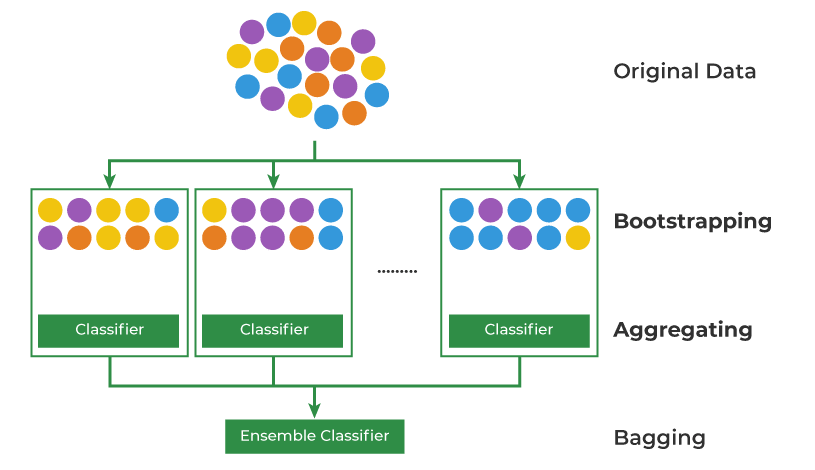

Base Model Training: In bagging multiple base models are used. After the Bootstrap Sampling each base model is independently trained using learning algorithm such as decision trees, support vector machines or neural networks on a different bootstrapped subset data. These models are typically called “Weak learners” because they are not highly accurate. Since the base model is trained independently and parallelly it makes it computationally efficient and time saving.
Aggregation: Once all the base models are trained and makes predictions on new unseen data then bagging classifier predicts class label for given instance by majority voting from all base learners. The class which has the majority voting is the prediction of the model.
Out-of-Bag (OOB) Evaluation: Some samples are excluded from the training subset of particular base models during the bootstrapping method. These “out-of-bag” samples can be used to estimate the model’s performance without the need for cross-validation.

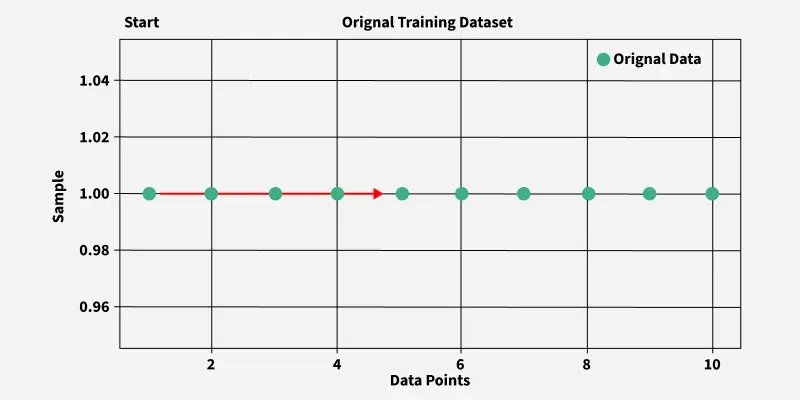

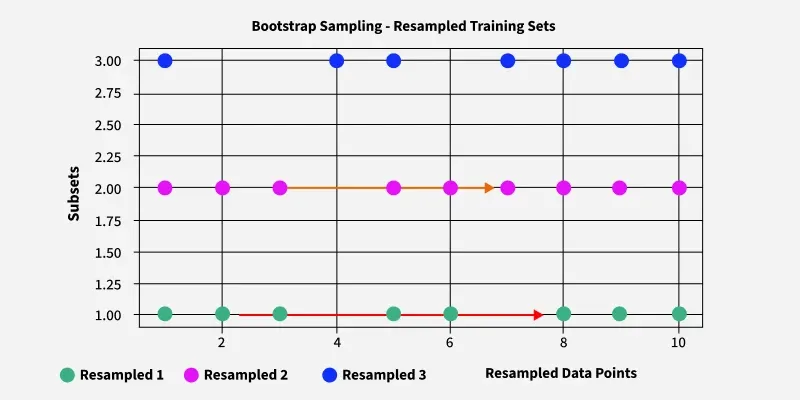

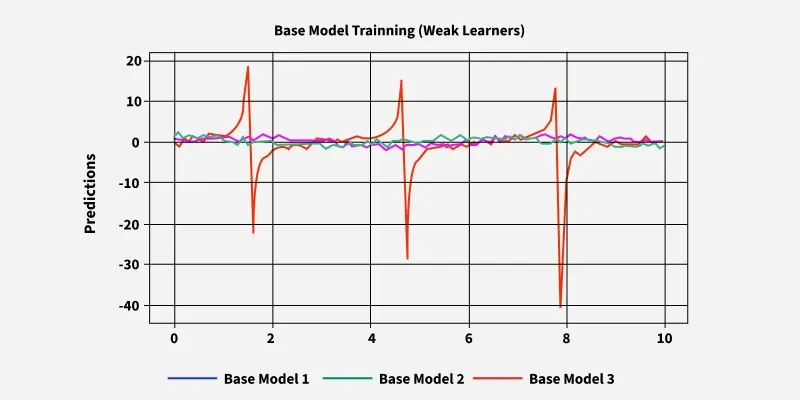

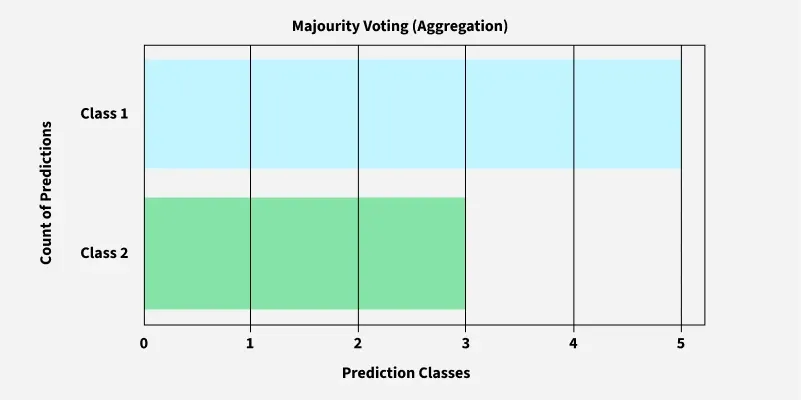

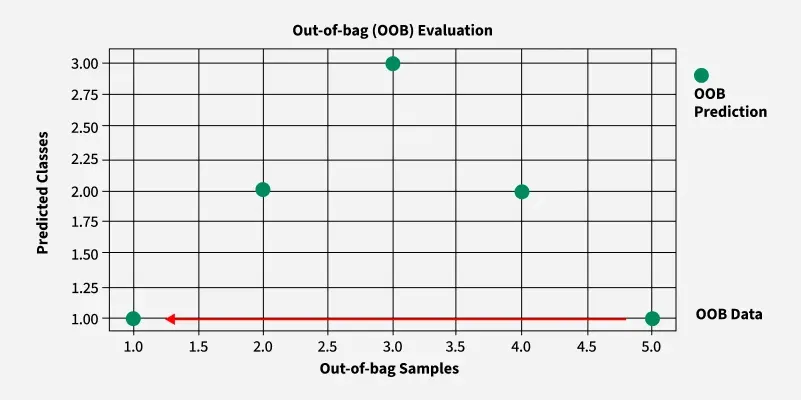

In [6]:
import numpy as np

class BaggingClassifier:
    def __init__(self, base_classifier, n_estimators):
        self.base_classifier = base_classifier
        self.n_estimators = n_estimators
        self.classifiers = []

    def fit(self, X, y):
          for _ in range(self.n_estimators):
              # Bootstrap sampling with replacement
              indices = np.random.choice(len(X), len(X), replace=True)
              X_sampled = X[indices]
              y_sampled = y[indices]

              # Create a new base classifier and train it on the sampled data
              classifier = self.base_classifier.__class__()
              classifier.fit(X_sampled, y_sampled)

              # Store the trained classifier in the list of classifiers
              self.classifiers.append(classifier)
          return self.classifiers
    def predict(self, X):
        # Make predictions using all the base classifiers
        predictions = [classifier.predict(X) for classifier in self.classifiers]
        # Aggregate predictions using majority voting
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

        return majority_votes

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Load the dataset
digit = load_digits()
X, y = digit.data, digit.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(base_classifier=dc, n_estimators=10)
classifiers = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9361111111111111


In [9]:
for i, clf in enumerate(classifiers):
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:"+str(i+1),':', accuracy)


Accuracy:1 : 0.8805555555555555
Accuracy:2 : 0.8611111111111112
Accuracy:3 : 0.8416666666666667
Accuracy:4 : 0.8388888888888889
Accuracy:5 : 0.8305555555555556
Accuracy:6 : 0.8166666666666667
Accuracy:7 : 0.875
Accuracy:8 : 0.8277777777777777
Accuracy:9 : 0.8527777777777777
Accuracy:10 : 0.8416666666666667


Advantages of Bagging Classifier
Improved Predictive Performance: It outperforms single classifiers by reducing overfitting and increasing predictive accuracy by combining multiple base models.
Robustness: Reduces the impact of outliers and noise in data by aggregating predictions from multiple models. This enhances the overall stability and robustness of the model.
Reduced Variance: Since each base model is trained on different subsets of the data the aggregated model’s variance is significantly reduced compared to individual model.
Parallel Working: Bagging allows parallel processing as each base model can be trained independently in parallel. This makes it computationally efficient for large datasets.
Flexibility: It can be applied to wide range of machine learning algorithms such as decision trees, random forests and support vector machines.
Disadvantages of Bagging:
Loss of Interpretability: It involves aggregating predictions from multiple models making it harder to interpret individual base model.
Computationally Expensive: As the number of iterations of bootstrap samples increases, computational cost of bagging also increase.
Applications of Bagging Classifier
Fraud Detection: It can be used to detect fraudulent transactions by aggregating predictions from multiple fraud detection models.
Spam filtering: It can be used to filter spam emails by aggregating predictions from multiple spam filters trained on different subsets of the spam emails.
Credit scoring: Can be used to improve the accuracy of credit scoring models by combining multiple models.
Image Classification: It can be used to improve the accuracy of image classification task.
Natural language processing: In NLP tasks it can combine predictions from multiple language models to achieve better text classification results.
Bagging Classifier is a ensemble learning technique that improve model prediction and robustness. It helps avoiding overfitting, improves generalization and gives better predictions by using combining multiple base models and can be used for wide range of applications.